In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [66]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
!unzip gdrive/MyDrive/Images.zip


Streaming output truncated to the last 5000 lines.
  inflating: Images/284/2.jpg        
  inflating: Images/284/3.jpg        
   creating: Images/285/
  inflating: Images/285/0.jpg        
  inflating: Images/285/1.jpg        
   creating: Images/286/
  inflating: Images/286/0.jpg        
  inflating: Images/286/1.jpg        
   creating: Images/287/
  inflating: Images/287/0.jpg        
  inflating: Images/287/1.jpg        
   creating: Images/288/
  inflating: Images/288/0.jpg        
  inflating: Images/288/1.jpg        
   creating: Images/289/
  inflating: Images/289/0.jpg        
  inflating: Images/289/1.jpg        
   creating: Images/29/
  inflating: Images/29/0.jpg         
  inflating: Images/29/1.jpg         
  inflating: Images/29/2.jpg         
  inflating: Images/29/3.jpg         
  inflating: Images/29/4.jpg         
   creating: Images/290/
  inflating: Images/290/0.jpg        
  inflating: Images/290/1.jpg        
   creating: Images/291/
  inflating: Images/291/0.jp

In [8]:
directory = "/content/Images"
import cv2

from google.colab.patches import cv2_imshow
img = cv2.imread('/content/Images/SupRay/S1 (5).jpg')
print(img)

[[[202 185 159]
  [204 187 161]
  [206 189 163]
  ...
  [ 82  94 122]
  [ 80  92 120]
  [ 77  89 117]]

 [[203 186 160]
  [204 187 161]
  [205 188 162]
  ...
  [ 79  91 119]
  [ 77  89 117]
  [ 76  88 116]]

 [[205 188 162]
  [205 188 162]
  [205 187 164]
  ...
  [ 77  89 117]
  [ 76  88 116]
  [ 77  89 117]]

 ...

 [[220 208 206]
  [220 208 206]
  [221 209 207]
  ...
  [ 74  97 135]
  [ 76  99 137]
  [ 77 100 138]]

 [[220 208 206]
  [220 208 206]
  [220 208 206]
  ...
  [ 75  98 136]
  [ 76  99 137]
  [ 76  99 137]]

 [[220 208 206]
  [220 208 206]
  [219 207 205]
  ...
  [ 75  98 136]
  [ 76  99 137]
  [ 76  99 137]]]


In [9]:
import tensorflow as tf

img_height,img_width=180,180
batch_size=16
import os

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 8286 files belonging to 1695 classes.
Using 6629 files for training.


# Preparing The Data

In [10]:
import os

#directory = "C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/Images"
filepath = []
for file in  os.listdir(directory):
 
   filepath.append(os.path.join(directory, file))
print(filepath)



['/content/Images/983', '/content/Images/1299', '/content/Images/817', '/content/Images/235', '/content/Images/895', '/content/Images/1178', '/content/Images/1246', '/content/Images/653', '/content/Images/1366', '/content/Images/1212', '/content/Images/1602', '/content/Images/1146', '/content/Images/1275', '/content/Images/1208', '/content/Images/857', '/content/Images/2', '/content/Images/228', '/content/Images/377', '/content/Images/1301', '/content/Images/1527', '/content/Images/612', '/content/Images/685', '/content/Images/595', '/content/Images/1505', '/content/Images/1199', '/content/Images/421', '/content/Images/652', '/content/Images/90', '/content/Images/77', '/content/Images/978', '/content/Images/169', '/content/Images/941', '/content/Images/264', '/content/Images/1033', '/content/Images/1357', '/content/Images/463', '/content/Images/348', '/content/Images/1648', '/content/Images/890', '/content/Images/1579', '/content/Images/446', '/content/Images/1638', '/content/Images/81

/content/Images/SupRay
['/content/Images/SupRay/S1 (5).jpg', '/content/Images/SupRay/S1 (1).jpg', '/content/Images/SupRay/S1 (2).jpg', '/content/Images/SupRay/S1 (3).jpg', '/content/Images/SupRay/S1 (4).jpg']
/content/Images/SupRay/S1 (5).jpg


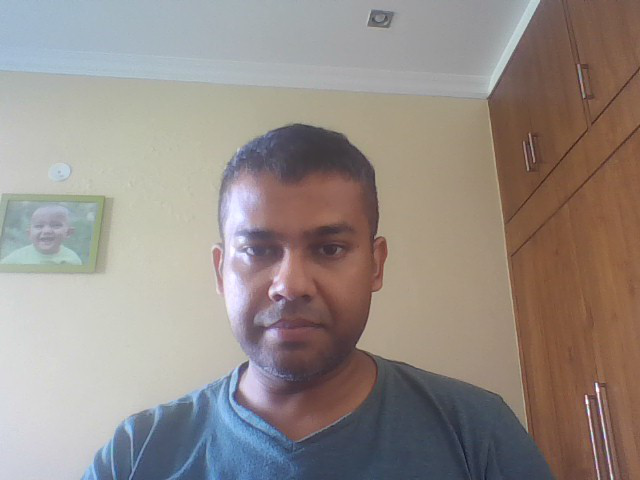

In [11]:
supray = os.path.join(directory,'SupRay')
print(supray)
supimage = []
for file in os.listdir(supray) :
    supimage.append(os.path.join(supray,file))
    
print(supimage)
    

print(supimage[0])
PIL.Image.open(str(supimage[0]))



In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height,img_width=180,180
batch_size=16
import os
directory =os.path.normpath(directory)
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')


train_ds1 = train_datagen.flow_from_directory(
        directory,
        shuffle = True ,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
print(directory)



Found 8286 images belonging to 1695 classes.
Found 8286 files belonging to 1695 classes.
Using 6629 files for training.
/content/Images


In [13]:
import numpy as np

len(np.concatenate([i for x, i in train_ds], axis=0))

6629

In [14]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 8286 files belonging to 1695 classes.
Using 1657 files for validation.


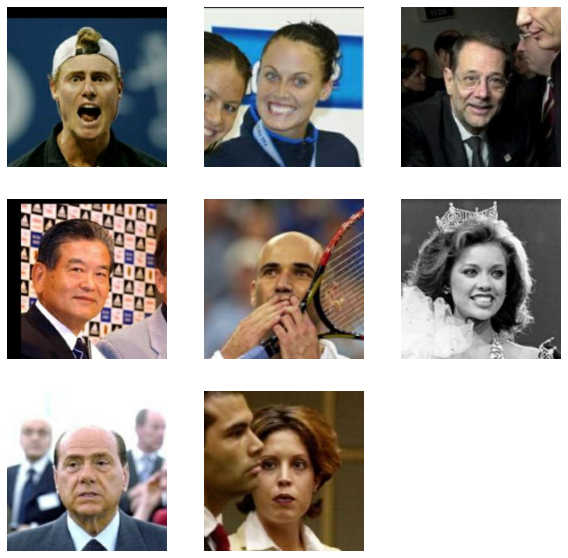

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    
    plt.axis("off")

In [16]:
class_names = train_ds.class_names
print(class_names)

['10', '100', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '101', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '102', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '103', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '104', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '105', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '106', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '107', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '108', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '109', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '11', '110', '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '111', '1110', '1111', '1112',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


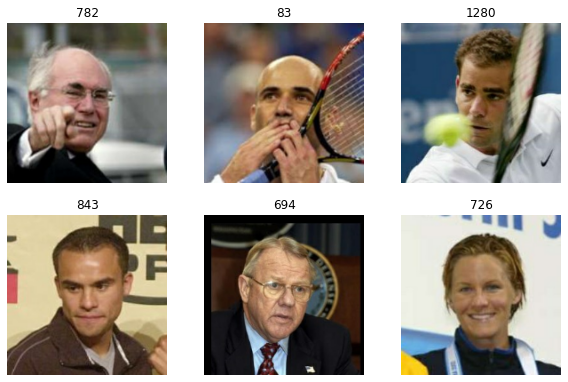

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [18]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=1695,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1695, activation='softmax'))

94781440/94765736 [==============================] - 1s 0us/step


In [19]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 1695)             869535    
 pper)                                                           
                                                                 
Total params: 25,506,335
Trainable params: 1,918,623
Non-trainable params: 23,587,712
____________________________________

In [20]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
epochs=30
history = resnet_model.fit(
  train_ds,
  #steps_per_epoch=totalTrain // config.BS
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
415/415 [==============================] - 38s 57ms/step - loss: 7.0938 - accuracy: 0.0110 - val_loss: 6.9320 - val_accuracy: 0.0139
Epoch 2/30
415/415 [==============================] - 23s 55ms/step - loss: 6.2749 - accuracy: 0.0216 - val_loss: 6.8336 - val_accuracy: 0.0199
Epoch 3/30
415/415 [==============================] - 23s 54ms/step - loss: 5.8529 - accuracy: 0.0367 - val_loss: 6.8453 - val_accuracy: 0.0278
Epoch 4/30
415/415 [==============================] - 23s 54ms/step - loss: 5.4860 - accuracy: 0.0462 - val_loss: 7.0647 - val_accuracy: 0.0344
Epoch 5/30
415/415 [==============================] - 23s 54ms/step - loss: 5.1986 - accuracy: 0.0622 - val_loss: 7.2639 - val_accuracy: 0.0392
Epoch 6/30
415/415 [==============================] - 23s 54ms/step - loss: 4.8953 - accuracy: 0.0769 - val_loss: 7.5392 - val_accuracy: 0.0380
Epoch 7/30
415/415 [==============================] - 23s 55ms/step - loss: 4.6394 - accuracy: 0.0955 - val_loss: 7.8094 - val_accuracy:

# Evaluating The Model

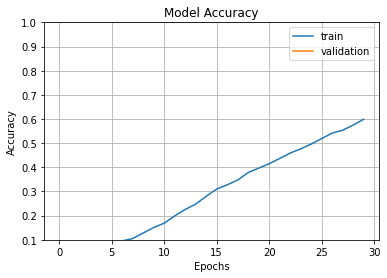

In [22]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.1,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

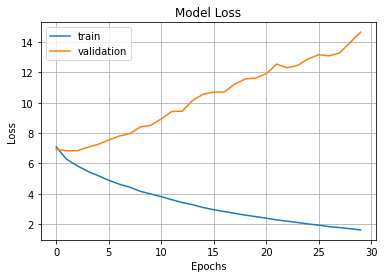

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [69]:
valimage= []
for file in os.listdir('/content/ValidationImage') :
  valimage.append(os.path.join('/content/ValidationImage',file))

In [ ]:
!unzip gdrive/MyDrive/ValidationImage.zip


# Making Predictions

(1, 180, 180, 3)


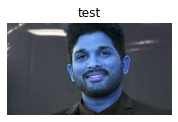

In [73]:
import cv2
image=cv2.imread(str(valimage[3]))
plt.figure(figsize=(10, 10))

ax = plt.subplot(3, 3, i + 1)
plt.imshow(image)
plt.title('test')
plt.axis("off")
image_resized= cv2.resize(image, (img_height,img_width))

image=np.expand_dims(image_resized,axis=0)

print(image.shape)


In [74]:
pred=resnet_model.predict(image)
print(pred)

[[6.6987892e-16 9.3293648e-19 1.2893101e-05 ... 3.6968740e-06
  3.6117702e-04 7.1037694e-12]]


In [75]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is 876


Archive:  gdrive/MyDrive/ValidationImage.zip
   creating: ValidationImage/
  inflating: ValidationImage/1.jpg   
  inflating: ValidationImage/11.jpg  
  inflating: ValidationImage/2.jpg   
  inflating: ValidationImage/3.jpg   
  inflating: ValidationImage/Allu1.jfif  
  inflating: ValidationImage/Allu2.jfif  
  inflating: ValidationImage/Allu3.jfif  
  inflating: ValidationImage/Allu4.jfif  
  inflating: ValidationImage/download.jfif  
  inflating: ValidationImage/sachin1.jpg  
  inflating: ValidationImage/Vijay2.jfif  
  inflating: ValidationImage/WIN_20220928_12_12_54_Pro.jpg  
  inflating: ValidationImage/WIN_20220928_12_12_58_Pro.jpg  
  inflating: ValidationImage/WIN_20220928_12_13_01_Pro.jpg  
  inflating: ValidationImage/WIN_20220928_12_13_05_Pro.jpg  
  inflating: ValidationImage/WIN_20220928_12_13_08_Pro.jpg  


In [65]:
!mkdir -p saved_model
resnet_model.save('saved_model/resnet_model') 

In [62]:
import cv2
from mtcnn.mtcnn import MTCNN
from deepface import DeepFace


#capture the video from webcam
webcam_video_stream = cv2.VideoCapture(0)

#create an instance of MTCNN detector
mtcnn_detector = MTCNN()

#initialize the array variable to hold all face locations in the frame
all_face_locations = []

#loop through every frame in the video
while True:
    #get the current frame from the video stream as an image
    ret,current_frame = webcam_video_stream.read()
    test = current_frame
    #resize the current frame to 1/4 size to proces faster
    current_frame_small = cv2.resize(current_frame,(0,0),fx=0.25,fy=0.25)
    #detect all face locations using the mtcnn dectector
    all_face_locations = mtcnn_detector.detect_faces(current_frame_small)
    #looping through the face locations
    for index,current_face_location in enumerate(all_face_locations):
        #splitting the tuple to get the four position values of current face
        x,y,width,height = current_face_location['box']
        left_pos = x
        top_pos = y
        right_pos = x+width
        bottom_pos = y+height
        #change the position maginitude to fit the actual size video frame
        top_pos = top_pos*4
        right_pos = right_pos*4
        bottom_pos = bottom_pos*4
        left_pos = left_pos*4
        #printing the location of current face
        #print('Found face {} at top:{},right:{},bottom:{},left:{}'.format(index+1,top_pos,right_pos,bottom_pos,left_pos))
        #draw rectangle around the face detected
        cv2.rectangle(current_frame,(left_pos,top_pos),(right_pos,bottom_pos),(0,0,255),2)
        #draw circles for every face keypoints
        keypoints = current_face_location['keypoints']
        x,y =  keypoints['left_eye']
        #print(x,y)
        #print(keypoints)
        #cv2.circle(current_frame,(keypoints['left_eye'][0]*4,keypoints['left_eye'][1]*4),5,(255,255,1),1)
        #cv2.circle(current_frame,(keypoints['right_eye'][0]*4,keypoints['right_eye'][1]*4),5,(255,255,1),1)
        #cv2.circle(current_frame,(keypoints['nose'][0]*4,keypoints['nose'][1]*4),5,(0,255,0),1)
        cv2.rectangle(current_frame,(keypoints['left_eye'][0]*4, keypoints['left_eye'][1]*4),((keypoints['left_eye'][0]+3)*4,(keypoints['left_eye'][1]+3)*4),(255,255,255),1)
        cv2.rectangle(current_frame,(keypoints['right_eye'][0]*4, keypoints['right_eye'][1]*4),((keypoints['right_eye'][0]+3)*4,(keypoints['right_eye'][1]+3)*4),(255,255,255),1)
        cv2.rectangle(current_frame,(keypoints['nose'][0]*4, keypoints['nose'][1]*4),((keypoints['nose'][0]+3)*4,(keypoints['nose'][1]+3)*4),(255,255,255),1)
        cv2.circle(current_frame,(keypoints['mouth_left'][0]*4,keypoints['mouth_left'][1]*4),5,(0,255,0),1)
        cv2.circle(current_frame,(keypoints['mouth_right'][0]*4,keypoints['mouth_right'][1]*4),5,(0,255,0),1)
        
       

    #showing the current face with rectangle drawn
    cv2.imshow("Webcam Video",current_frame)
    #face recognition

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

        

#release the stream and cam
#close all opencv windows open
webcam_video_stream.release()
cv2.destroyAllWindows()      

ModuleNotFoundError: ignored

In [ ]:
image_resized= cv2.resize(current_frame, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

print(image)

[[[[161 163 173]
   [159 163 168]
   [160 167 170]
   ...
   [159 190 189]
   [160 194 194]
   [160 194 194]]

  [[162 163 171]
   [162 164 169]
   [161 163 171]
   ...
   [159 192 191]
   [162 193 194]
   [161 194 194]]

  [[160 165 167]
   [160 164 169]
   [158 161 169]
   ...
   [160 192 191]
   [161 192 193]
   [160 192 194]]

  ...

  [[ 72  84 130]
   [ 72  85 131]
   [ 74  85 131]
   ...
   [ 89 108 118]
   [ 89 103 116]
   [ 90  98 114]]

  [[ 75  83 132]
   [ 73  83 131]
   [ 70  84 130]
   ...
   [ 81 104 108]
   [ 83 102 108]
   [ 86  99 109]]

  [[ 70  83 132]
   [ 71  84 132]
   [ 67  82 128]
   ...
   [ 75  97  98]
   [ 78  96  99]
   [ 84  95 100]]]]


In [ ]:
pred=resnet_model.predict(image)
print(pred)

[[1.3393924e-03 5.1719449e-03 4.4175446e-05 4.5668225e-05 3.4318571e-05
  5.0090980e-06 2.5747563e-03 1.0172234e-04 1.1734013e-06 3.7349091e-06
  1.7671720e-05 1.3862705e-05 1.6170747e-04 9.9045324e-01 7.9730808e-06
  2.3420962e-05 9.4398395e-08 1.2510527e-07]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is SupRay


['C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/ValidationImage\\Allu1.jfif', 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/ValidationImage\\sachin1.jpg']
C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/ValidationImage\Allu1.jfif


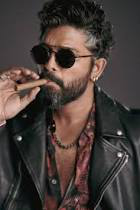

In [ ]:
validation_dir = 'C:/Users/Supra/Documents/Supravat/Documents/ISB/Capstone Project/ValidationImage'
valimage = []
for file in os.listdir(validation_dir) :
    valimage.append(os.path.join(validation_dir,file))
    
print(valimage)
    

print(valimage[0])
PIL.Image.open(str(valimage[0]))

[[[49 49 49]
  [49 49 49]
  [49 49 49]
  ...
  [44 42 41]
  [44 42 41]
  [44 42 41]]

 [[49 49 49]
  [50 50 50]
  [50 50 50]
  ...
  [45 43 42]
  [45 43 42]
  [45 43 42]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [45 43 42]
  [45 43 42]
  [45 43 42]]

 ...

 [[32 30 21]
  [32 30 21]
  [25 24 15]
  ...
  [33 35 29]
  [32 34 28]
  [32 34 28]]

 [[28 27 14]
  [24 23 10]
  [21 20  8]
  ...
  [31 31 25]
  [31 32 26]
  [34 34 28]]

 [[28 28 12]
  [21 21  5]
  [19 18  4]
  ...
  [30 30 24]
  [31 31 25]
  [34 34 28]]]
(1, 180, 180, 3)


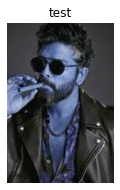

In [ ]:
import cv2
image=cv2.imread(str(valimage[0]))
plt.figure(figsize=(10, 10))

ax = plt.subplot(3, 3, i + 1)
plt.imshow(image)
plt.title('test')
plt.axis("off")
image_resized= cv2.resize(image, (img_height,img_width))
print(image_resized)
image=np.expand_dims(image_resized,axis=0)

print(image.shape)

In [ ]:
pred=resnet_model.predict(image)
print(pred)

[[9.2394456e-02 2.2544976e-02 9.1730617e-04 2.2207657e-02 1.2002069e-01
  1.8503139e-02 2.7865675e-01 2.0760274e-01 9.4288764e-05 1.0076521e-02
  7.0469268e-04 6.0331688e-04 1.6388163e-01 6.9593382e-03 1.3082917e-02
  4.1720610e-02 2.8358341e-05 6.4671099e-07]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is MaryKom
